In [6]:
from typing import Dict
import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

def model_cryostat_heat(
    temp_attenuation: Dict[float, float], 
    input_power: float, 
    absorption_coeff: float
) -> None:
    lowest_temp = min(temp_attenuation.keys())
    
    sorted_temps = sorted(temp_attenuation.keys(), reverse=True)
    
    total_heat_dissipated = 0
    powers = []
    
    remaining_power = input_power
    for temp in sorted_temps:
        attenuation = temp_attenuation[temp]
        heat_dissipated = remaining_power * (1 - attenuation)
        total_heat_dissipated += heat_dissipated
        
        if temp != lowest_temp:
            carnot_efficiency = 1 - (lowest_temp / temp)
            power_required = heat_dissipated / carnot_efficiency if carnot_efficiency != 0 else 0
        else:
            power_required = 0
        
        powers.append(power_required)
        
        remaining_power *= attenuation
        remaining_power += heat_dissipated * (1 - absorption_coeff) if temp == lowest_temp else 0
    
    if np.isclose(total_heat_dissipated, input_power, atol=1e-6):
        logger.info("Total heat dissipated is equal to input power.")
    else:
        logger.info("Total heat dissipated is not equal to input power.")
    
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_temps, powers, marker='o')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Power Required (W)')
    plt.title('Power Required to Evacuate Heat at Different Temperatures')
    plt.show()


In [7]:
plt.show()


2023-10-04 08:45:40.427 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.


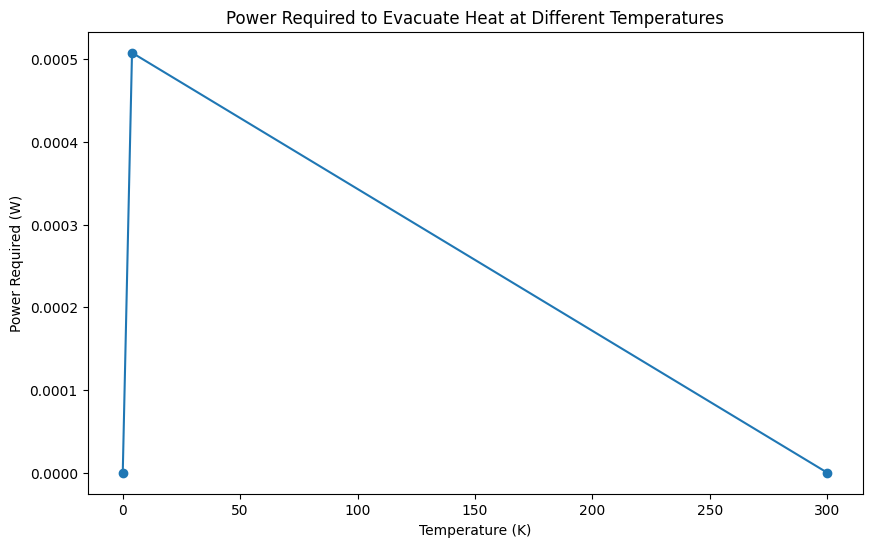

In [8]:
# Define temperature and attenuation dictionary
temp_attenuation = {
    300: 1,  # 300K with no attenuation
    4: 0.5,  # 4K with 0.5 attenuation
    0.06: 0.1  # 0.06K with 0.1 attenuation
}

# Define input power in watts
input_power = 1e-3  # 1mW

# Define absorption coefficient for the lowest temperature surface
absorption_coeff = 0.1

# Call the function
model_cryostat_heat(temp_attenuation, input_power, absorption_coeff)

2023-10-04 08:51:16.902 | INFO     | __main__:model_cryostat_heat:32 - Total heat dissipated is not equal to input power.
2023-10-04 08:51:16.903 | INFO     | __main__:model_cryostat_heat:32 - Total heat dissipated is not equal to input power.
2023-10-04 08:51:16.903 | INFO     | __main__:model_cryostat_heat:32 - Total heat dissipated is not equal to input power.
2023-10-04 08:51:16.904 | INFO     | __main__:model_cryostat_heat:32 - Total heat dissipated is not equal to input power.
2023-10-04 08:51:16.904 | INFO     | __main__:model_cryostat_heat:32 - Total heat dissipated is not equal to input power.
2023-10-04 08:51:16.905 | INFO     | __main__:model_cryostat_heat:32 - Total heat dissipated is not equal to input power.
2023-10-04 08:51:16.905 | INFO     | __main__:model_cryostat_heat:32 - Total heat dissipated is not equal to input power.
2023-10-04 08:51:16.905 | INFO     | __main__:model_cryostat_heat:32 - Total heat dissipated is not equal to input power.
2023-10-04 08:51:16.906 

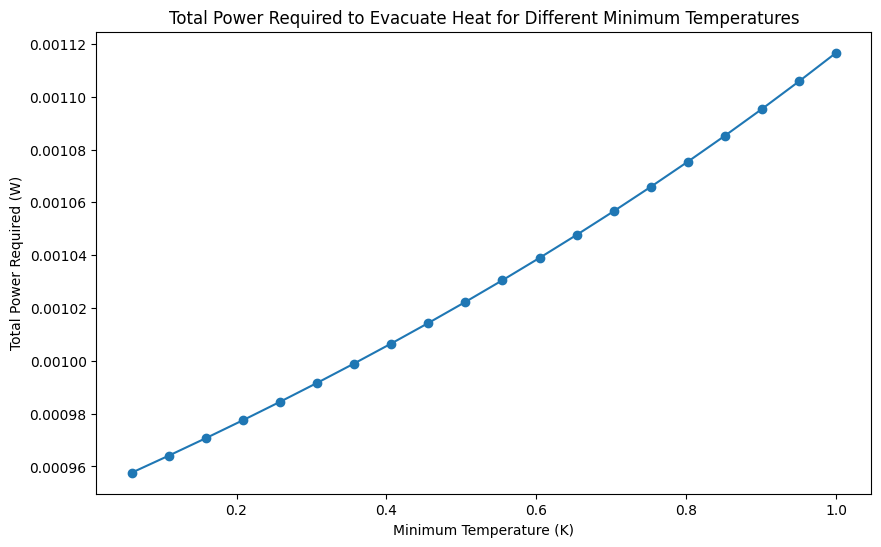

In [10]:
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

def model_cryostat_heat(
    temp_attenuation: Dict[float, float], 
    input_power: float, 
    absorption_coeff: float
) -> float:
    lowest_temp = min(temp_attenuation.keys())
    sorted_temps = sorted(temp_attenuation.keys(), reverse=True)
    total_heat_dissipated = 0
    total_power_required = 0
    
    remaining_power = input_power
    for temp in sorted_temps:
        attenuation = temp_attenuation[temp]
        heat_dissipated = remaining_power * (1 - attenuation)
        total_heat_dissipated += heat_dissipated
        
        carnot_efficiency = 1 - (lowest_temp / temp) if temp != lowest_temp else 0
        power_required = heat_dissipated / carnot_efficiency if carnot_efficiency != 0 else heat_dissipated
        total_power_required += power_required
        
        remaining_power *= attenuation
        remaining_power += heat_dissipated * (1 - absorption_coeff) if temp == lowest_temp else 0
    
    if np.isclose(total_heat_dissipated, input_power, atol=1e-6):
        logger.info("Total heat dissipated is equal to input power.")
    else:
        logger.info("Total heat dissipated is not equal to input power.")
    
    return total_power_required

def plot_total_power_vs_min_temp(
    base_temp_attenuation: Dict[float, float], 
    input_power: float, 
    min_temp_range: List[float]
) -> None:
    total_powers = []
    for min_temp in min_temp_range:
        temp_attenuation = base_temp_attenuation.copy()
        temp_attenuation[min_temp] = 0.1
        total_power_required = model_cryostat_heat(temp_attenuation, input_power, 0.1)
        total_powers.append(total_power_required)
    
    plt.figure(figsize=(10, 6))
    plt.plot(min_temp_range, total_powers, marker='o')
    plt.xlabel('Minimum Temperature (K)')
    plt.ylabel('Total Power Required (W)')
    plt.title('Total Power Required to Evacuate Heat for Different Minimum Temperatures')
    plt.show()

# Define temperature and attenuation dictionary
base_temp_attenuation = {
    300: 1,  # 300K with no attenuation
    4: 0.5  # 4K with 0.5 attenuation
}

# Define input power in watts
input_power = 1e-3  # 1mW

# Define range of minimum temperatures
min_temp_range = np.linspace(0.06, 1, 20)

# Generate the plot
plot_total_power_vs_min_temp(base_temp_attenuation, input_power, min_temp_range.tolist())


2023-10-04 08:53:40.340 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:40.341 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:40.341 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:40.342 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:40.342 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:40.343 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:40.343 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:40.344 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:40.344 

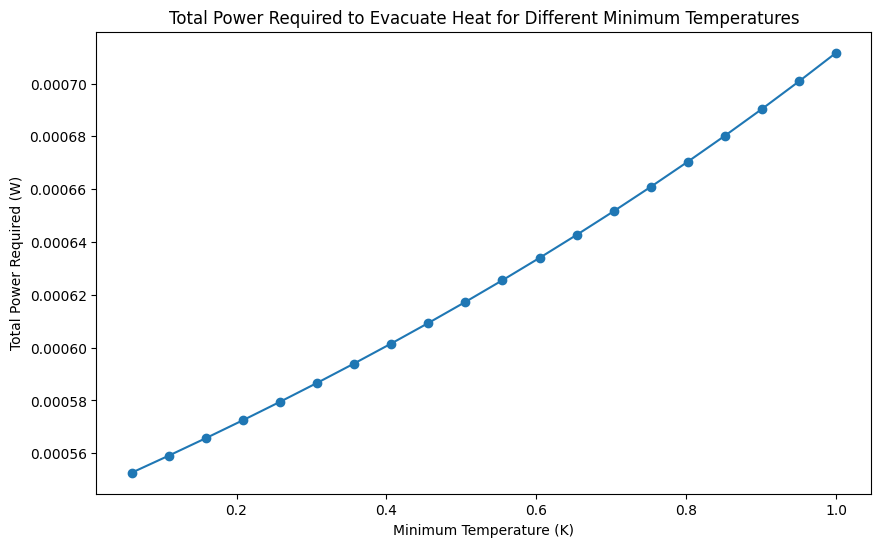

In [11]:
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

def model_cryostat_heat(
    temp_attenuation: Dict[float, float], 
    input_power: float, 
    absorption_coeff: float
) -> float:
    lowest_temp = min(temp_attenuation.keys())
    sorted_temps = sorted(temp_attenuation.keys(), reverse=True)
    total_heat_dissipated = 0
    total_power_required = 0
    
    remaining_power = input_power
    for temp in sorted_temps:
        attenuation = temp_attenuation[temp]
        heat_dissipated = remaining_power * (1 - attenuation)
        total_heat_dissipated += heat_dissipated
        
        if temp == lowest_temp:
            heat_dissipated *= absorption_coeff
        
        carnot_efficiency = 1 - (lowest_temp / temp) if temp != lowest_temp else 0
        power_required = heat_dissipated / carnot_efficiency if carnot_efficiency != 0 else heat_dissipated
        total_power_required += power_required
        
        remaining_power *= attenuation
    
    if np.isclose(total_heat_dissipated, input_power, atol=1e-6):
        logger.info("Total heat dissipated is equal to input power.")
    else:
        logger.info("Total heat dissipated is not equal to input power.")
    
    return total_power_required

def plot_total_power_vs_min_temp(
    base_temp_attenuation: Dict[float, float], 
    input_power: float, 
    min_temp_range: List[float]
) -> None:
    total_powers = []
    for min_temp in min_temp_range:
        temp_attenuation = base_temp_attenuation.copy()
        temp_attenuation[min_temp] = 0.1
        total_power_required = model_cryostat_heat(temp_attenuation, input_power, 0.1)
        total_powers.append(total_power_required)
    
    plt.figure(figsize=(10, 6))
    plt.plot(min_temp_range, total_powers, marker='o')
    plt.xlabel('Minimum Temperature (K)')
    plt.ylabel('Total Power Required (W)')
    plt.title('Total Power Required to Evacuate Heat for Different Minimum Temperatures')
    plt.show()

# Define temperature and attenuation dictionary
base_temp_attenuation = {
    300: 1,  # 300K with no attenuation
    4: 0.5  # 4K with 0.5 attenuation
}

# Define input power in watts
input_power = 1e-3  # 1mW

# Define range of minimum temperatures
min_temp_range = np.linspace(0.06, 1, 20)

# Generate the plot
plot_total_power_vs_min_temp(base_temp_attenuation, input_power, min_temp_range.tolist())


2023-10-04 08:53:53.118 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:53.119 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:53.120 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:53.120 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:53.121 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:53.121 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:53.121 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:53.121 | INFO     | __main__:model_cryostat_heat:34 - Total heat dissipated is not equal to input power.
2023-10-04 08:53:53.122 

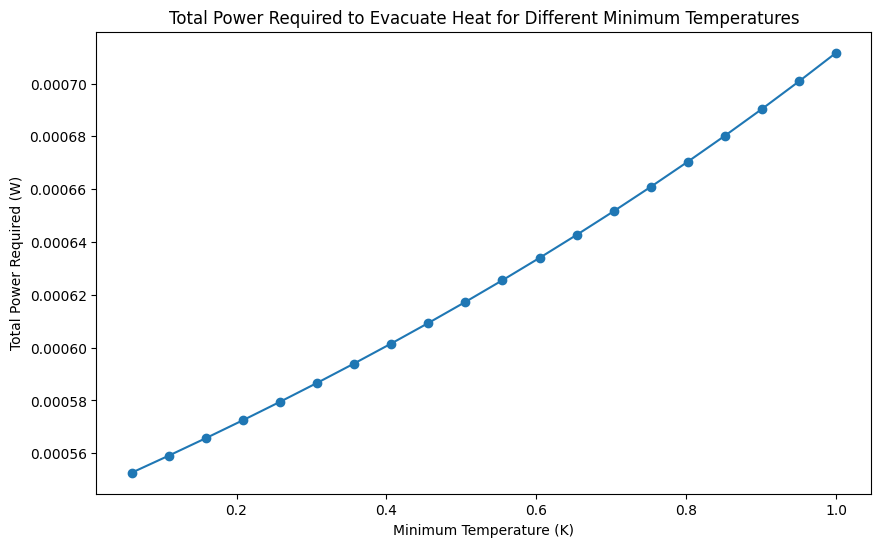

In [12]:
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

def model_cryostat_heat(
    temp_attenuation: Dict[float, float], 
    input_power: float, 
    absorption_coeff: float
) -> float:
    lowest_temp = min(temp_attenuation.keys())
    sorted_temps = sorted(temp_attenuation.keys(), reverse=True)
    total_heat_dissipated = 0
    total_power_required = 0
    
    remaining_power = input_power
    for temp in sorted_temps:
        attenuation = temp_attenuation[temp]
        heat_dissipated = remaining_power * (1 - attenuation)
        total_heat_dissipated += heat_dissipated
        
        if temp == lowest_temp:
            heat_dissipated *= absorption_coeff
        
        carnot_efficiency = 1 - (lowest_temp / temp) if temp != lowest_temp else 0
        power_required = heat_dissipated / carnot_efficiency if carnot_efficiency != 0 else heat_dissipated
        total_power_required += power_required
        
        remaining_power *= attenuation
    
    if np.isclose(total_heat_dissipated, input_power, atol=1e-6):
        logger.info("Total heat dissipated is equal to input power.")
    else:
        logger.info("Total heat dissipated is not equal to input power.")
    
    return total_power_required

def plot_total_power_vs_min_temp(
    base_temp_attenuation: Dict[float, float], 
    input_power: float, 
    min_temp_range: List[float]
) -> None:
    total_powers = []
    for min_temp in min_temp_range:
        temp_attenuation = base_temp_attenuation.copy()
        temp_attenuation[min_temp] = 0.1
        total_power_required = model_cryostat_heat(temp_attenuation, input_power, 0.1)
        total_powers.append(total_power_required)
    
    plt.figure(figsize=(10, 6))
    plt.plot(min_temp_range, total_powers, marker='o')
    plt.xlabel('Minimum Temperature (K)')
    plt.ylabel('Total Power Required (W)')
    plt.title('Total Power Required to Evacuate Heat for Different Minimum Temperatures')
    plt.show()

# Define temperature and attenuation dictionary
base_temp_attenuation = {
    300: 1,  # 300K with no attenuation
    4: 0.5  # 4K with 0.5 attenuation
}

# Define input power in watts
input_power = 1e-3  # 1mW

# Define range of minimum temperatures
min_temp_range = np.linspace(0.06, 1, 20)

# Generate the plot
plot_total_power_vs_min_temp(base_temp_attenuation, input_power, min_temp_range.tolist())


2023-10-04 08:55:09.510 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 08:55:09.511 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 08:55:09.511 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 08:55:09.511 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 08:55:09.512 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 08:55:09.512 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 08:55:09.512 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 08:55:09.512 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 08:55:09.513 

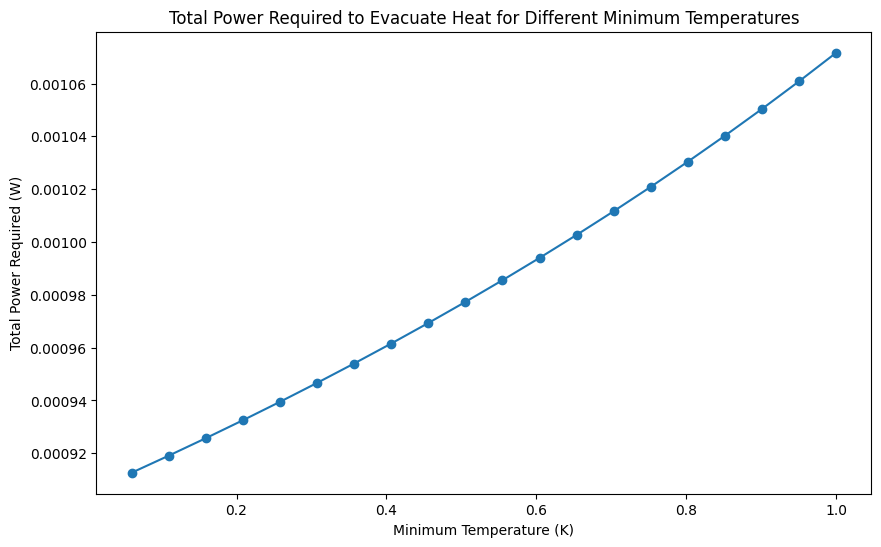

In [13]:
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

def model_cryostat_heat(
    temp_attenuation: Dict[float, float], 
    input_power: float, 
    absorption_coeff: float
) -> float:
    lowest_temp = min(temp_attenuation.keys())
    sorted_temps = sorted(temp_attenuation.keys(), reverse=True)
    
    total_heat_dissipated = 0
    total_power_required = 0
    
    remaining_power = input_power
    for temp in sorted_temps:
        attenuation = temp_attenuation[temp]
        heat_dissipated = remaining_power * (1 - attenuation)
        
        if temp == lowest_temp:
            heat_absorbed = heat_dissipated * absorption_coeff
            heat_dissipated -= heat_absorbed
            remaining_power += heat_absorbed
        
        total_heat_dissipated += heat_dissipated
        
        carnot_efficiency = 1 - (lowest_temp / temp) if temp != lowest_temp else 0
        power_required = heat_dissipated / carnot_efficiency if carnot_efficiency != 0 else heat_dissipated
        total_power_required += power_required
        
        remaining_power *= attenuation
    
    if np.isclose(total_heat_dissipated, input_power, atol=1e-6):
        logger.info("Total heat dissipated is equal to input power.")
    else:
        logger.info("Total heat dissipated is not equal to input power.")
    
    return total_power_required

def plot_total_power_vs_min_temp(
    base_temp_attenuation: Dict[float, float], 
    input_power: float, 
    min_temp_range: List[float]
) -> None:
    total_powers = []
    for min_temp in min_temp_range:
        temp_attenuation = base_temp_attenuation.copy()
        temp_attenuation[min_temp] = 0.1
        total_power_required = model_cryostat_heat(temp_attenuation, input_power, 0.1)
        total_powers.append(total_power_required)
    
    plt.figure(figsize=(10, 6))
    plt.plot(min_temp_range, total_powers, marker='o')
    plt.xlabel('Minimum Temperature (K)')
    plt.ylabel('Total Power Required (W)')
    plt.title('Total Power Required to Evacuate Heat for Different Minimum Temperatures')
    plt.show()

# Define temperature and attenuation dictionary
base_temp_attenuation = {
    300: 1,  # 300K with no attenuation
    4: 0.5  # 4K with 0.5 attenuation
}

# Define input power in watts
input_power = 1e-3  # 1mW

# Define range of minimum temperatures
min_temp_range = np.linspace(0.06, 1, 20)

# Generate the plot
plot_total_power_vs_min_temp(base_temp_attenuation, input_power, min_temp_range.tolist())


2023-10-04 09:01:07.088 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:01:07.089 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:01:07.090 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:01:07.090 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:01:07.091 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:01:07.091 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:01:07.092 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:01:07.092 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:01:07.093 

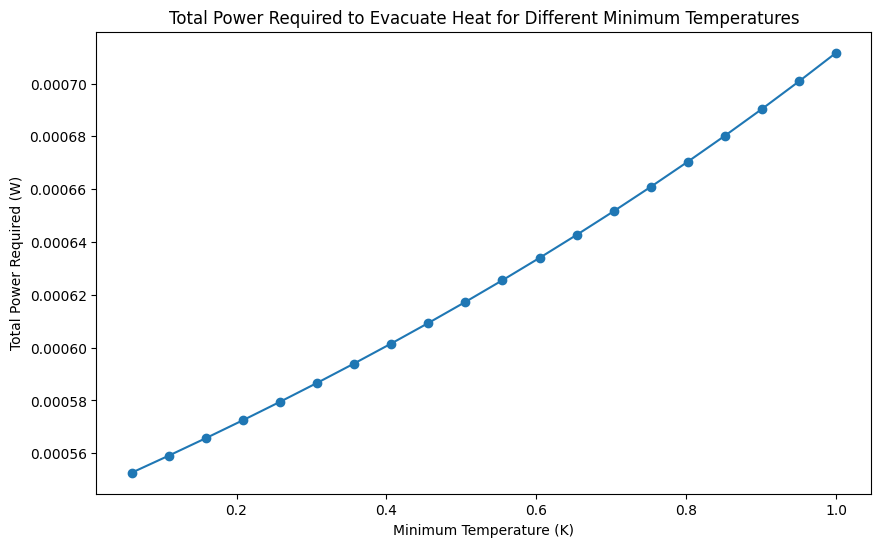

In [14]:
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

def model_cryostat_heat(
    temp_attenuation: Dict[float, float], 
    input_power: float, 
    absorption_coeff: float
) -> float:
    lowest_temp = min(temp_attenuation.keys())
    sorted_temps = sorted(temp_attenuation.keys(), reverse=True)
    
    total_heat_dissipated = 0
    total_power_required = 0
    
    remaining_power = input_power
    for temp in sorted_temps:
        attenuation = temp_attenuation[temp]
        heat_dissipated = remaining_power * (1 - attenuation)
        
        if temp == lowest_temp:
            heat_absorbed = heat_dissipated * absorption_coeff
            heat_dissipated = heat_absorbed
            remaining_power += heat_dissipated * (1 - absorption_coeff)
        
        total_heat_dissipated += heat_dissipated
        
        carnot_efficiency = 1 - (lowest_temp / temp) if temp != lowest_temp else 0
        power_required = heat_dissipated / carnot_efficiency if carnot_efficiency != 0 else heat_dissipated
        total_power_required += power_required
        
        remaining_power *= attenuation
    
    if np.isclose(total_heat_dissipated, input_power, atol=1e-6):
        logger.info("Total heat dissipated is equal to input power.")
    else:
        logger.info("Total heat dissipated is not equal to input power.")
    
    return total_power_required

def plot_total_power_vs_min_temp(
    base_temp_attenuation: Dict[float, float], 
    input_power: float, 
    min_temp_range: List[float]
) -> None:
    total_powers = []
    for min_temp in min_temp_range:
        temp_attenuation = base_temp_attenuation.copy()
        temp_attenuation[min_temp] = 0.1
        total_power_required = model_cryostat_heat(temp_attenuation, input_power, 0.1)
        total_powers.append(total_power_required)
    
    plt.figure(figsize=(10, 6))
    plt.plot(min_temp_range, total_powers, marker='o')
    plt.xlabel('Minimum Temperature (K)')
    plt.ylabel('Total Power Required (W)')
    plt.title('Total Power Required to Evacuate Heat for Different Minimum Temperatures')
    plt.show()

# Define temperature and attenuation dictionary
base_temp_attenuation = {
    300: 1,  # 300K with no attenuation
    4: 0.5  # 4K with 0.5 attenuation
}

# Define input power in watts
input_power = 1e-3  # 1mW

# Define range of minimum temperatures
min_temp_range = np.linspace(0.06, 1, 20)

# Generate the plot
plot_total_power_vs_min_temp(base_temp_attenuation, input_power, min_temp_range.tolist())


2023-10-04 09:04:17.935 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:17.936 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:17.936 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:17.937 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:17.937 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:17.938 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:17.938 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:17.938 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:17.939 

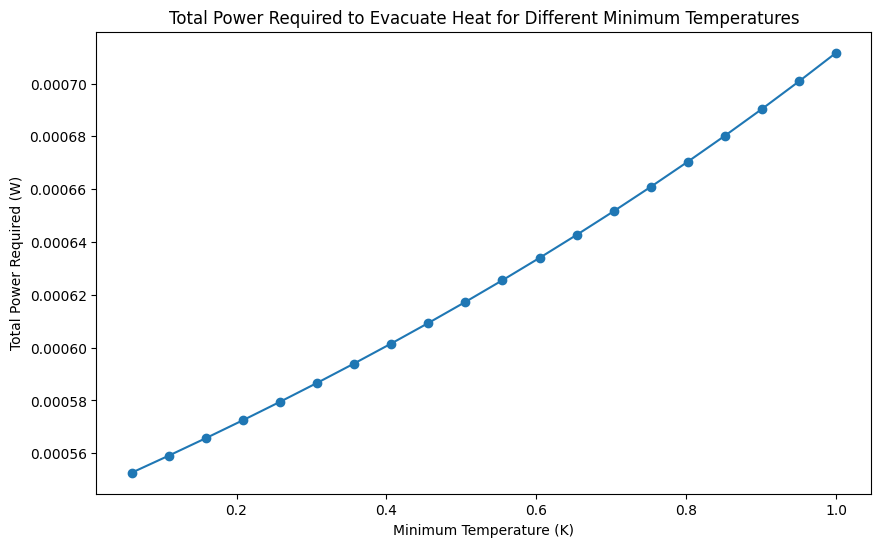

In [15]:
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

def model_cryostat_heat(
    temp_attenuation: Dict[float, float], 
    input_power: float, 
    absorption_coeff: float
) -> float:
    lowest_temp = min(temp_attenuation.keys())
    sorted_temps = sorted(temp_attenuation.keys(), reverse=True)
    
    total_heat_dissipated = 0
    total_power_required = 0
    
    remaining_power = input_power
    for temp in sorted_temps:
        attenuation = temp_attenuation[temp]
        heat_dissipated = remaining_power * (1 - attenuation)
        
        if temp == lowest_temp:
            heat_absorbed = heat_dissipated * absorption_coeff
            heat_dissipated = heat_absorbed
            remaining_power += heat_dissipated * (1 - absorption_coeff)
        
        total_heat_dissipated += heat_dissipated
        
        carnot_efficiency = 1 - (lowest_temp / temp) if temp != lowest_temp else 0
        power_required = heat_dissipated / carnot_efficiency if carnot_efficiency != 0 else heat_dissipated
        total_power_required += power_required
        
        remaining_power *= attenuation
    
    if np.isclose(total_heat_dissipated, input_power, atol=1e-6):
        logger.info("Total heat dissipated is equal to input power.")
    else:
        logger.info("Total heat dissipated is not equal to input power.")
    
    return total_power_required

def plot_total_power_vs_min_temp(
    base_temp_attenuation: Dict[float, float], 
    input_power: float, 
    min_temp_range: List[float]
) -> None:
    total_powers = []
    for min_temp in min_temp_range:
        temp_attenuation = base_temp_attenuation.copy()
        temp_attenuation[min_temp] = 0.1
        total_power_required = model_cryostat_heat(temp_attenuation, input_power, 0.1)
        total_powers.append(total_power_required)
    
    plt.figure(figsize=(10, 6))
    plt.plot(min_temp_range, total_powers, marker='o')
    plt.xlabel('Minimum Temperature (K)')
    plt.ylabel('Total Power Required (W)')
    plt.title('Total Power Required to Evacuate Heat for Different Minimum Temperatures')
    plt.show()

# Define temperature and attenuation dictionary
base_temp_attenuation = {
    300: 1,  # 300K with no attenuation
    4: 0.5  # 4K with 0.5 attenuation
}

# Define input power in watts
input_power = 1e-3  # 1mW

# Define range of minimum temperatures
min_temp_range = np.linspace(0.06, 1, 20)

# Generate the plot
plot_total_power_vs_min_temp(base_temp_attenuation, input_power, min_temp_range.tolist())


2023-10-04 09:04:30.627 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:30.628 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:30.628 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:30.629 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:30.629 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:30.629 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:30.630 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:30.630 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:30.631 

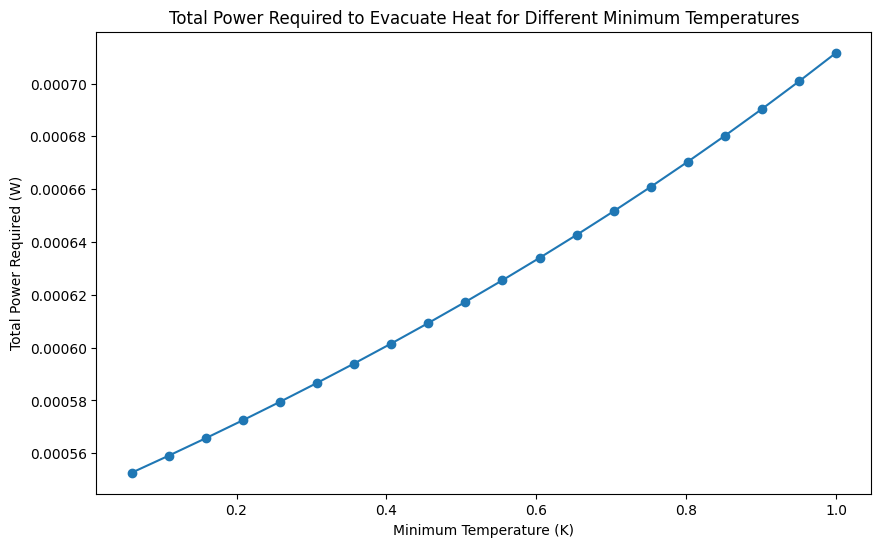

In [16]:
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

def model_cryostat_heat(
    temp_attenuation: Dict[float, float], 
    input_power: float, 
    absorption_coeff: float
) -> float:
    lowest_temp = min(temp_attenuation.keys())
    sorted_temps = sorted(temp_attenuation.keys(), reverse=True)
    
    total_heat_dissipated = 0
    total_power_required = 0
    
    remaining_power = input_power
    for temp in sorted_temps:
        attenuation = temp_attenuation[temp]
        heat_dissipated = remaining_power * (1 - attenuation)
        
        if temp == lowest_temp:
            heat_absorbed = heat_dissipated * absorption_coeff
            heat_dissipated = heat_absorbed
            remaining_power += heat_dissipated * (1 - absorption_coeff)
        
        total_heat_dissipated += heat_dissipated
        
        carnot_efficiency = 1 - (lowest_temp / temp) if temp != lowest_temp else 0
        power_required = heat_dissipated / carnot_efficiency if carnot_efficiency != 0 else heat_dissipated
        total_power_required += power_required
        
        remaining_power *= attenuation
    
    if np.isclose(total_heat_dissipated, input_power, atol=1e-6):
        logger.info("Total heat dissipated is equal to input power.")
    else:
        logger.info("Total heat dissipated is not equal to input power.")
    
    return total_power_required

def plot_total_power_vs_min_temp(
    base_temp_attenuation: Dict[float, float], 
    input_power: float, 
    min_temp_range: List[float]
) -> None:
    total_powers = []
    for min_temp in min_temp_range:
        temp_attenuation = base_temp_attenuation.copy()
        temp_attenuation[min_temp] = 0.1
        total_power_required = model_cryostat_heat(temp_attenuation, input_power, 0.1)
        total_powers.append(total_power_required)
    
    plt.figure(figsize=(10, 6))
    plt.plot(min_temp_range, total_powers, marker='o')
    plt.xlabel('Minimum Temperature (K)')
    plt.ylabel('Total Power Required (W)')
    plt.title('Total Power Required to Evacuate Heat for Different Minimum Temperatures')
    plt.show()

# Define temperature and attenuation dictionary
base_temp_attenuation = {
    300: 1,  # 300K with no attenuation
    4: 0.5  # 4K with 0.5 attenuation
}

# Define input power in watts
input_power = 1e-3  # 1mW

# Define range of minimum temperatures
min_temp_range = np.linspace(0.06, 1, 20)

# Generate the plot
plot_total_power_vs_min_temp(base_temp_attenuation, input_power, min_temp_range.tolist())


2023-10-04 09:04:51.059 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:51.060 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:51.060 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:51.060 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:51.061 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:51.061 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:51.061 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:51.061 | INFO     | __main__:model_cryostat_heat:38 - Total heat dissipated is not equal to input power.
2023-10-04 09:04:51.062 

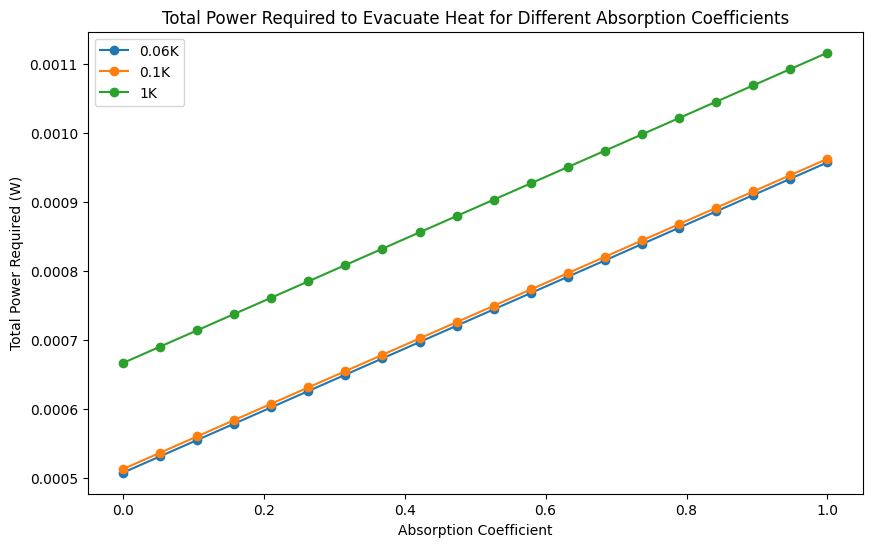

In [17]:
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

def model_cryostat_heat(
    temp_attenuation: Dict[float, float], 
    input_power: float, 
    absorption_coeff: float
) -> float:
    lowest_temp = min(temp_attenuation.keys())
    sorted_temps = sorted(temp_attenuation.keys(), reverse=True)
    
    total_heat_dissipated = 0
    total_power_required = 0
    
    remaining_power = input_power
    for temp in sorted_temps:
        attenuation = temp_attenuation[temp]
        heat_dissipated = remaining_power * (1 - attenuation)
        
        if temp == lowest_temp:
            heat_absorbed = heat_dissipated * absorption_coeff
            heat_dissipated = heat_absorbed
            remaining_power += heat_dissipated * (1 - absorption_coeff)
        
        total_heat_dissipated += heat_dissipated
        
        carnot_efficiency = 1 - (lowest_temp / temp) if temp != lowest_temp else 0
        power_required = heat_dissipated / carnot_efficiency if carnot_efficiency != 0 else heat_dissipated
        total_power_required += power_required
        
        remaining_power *= attenuation
    
    if np.isclose(total_heat_dissipated, input_power, atol=1e-6):
        logger.info("Total heat dissipated is equal to input power.")
    else:
        logger.info("Total heat dissipated is not equal to input power.")
    
    return total_power_required

def plot_total_power_vs_absorption_coeff(
    base_temp_attenuation: Dict[float, float], 
    input_power: float, 
    min_temps: List[float],
    absorption_coeff_range: List[float]
) -> None:
    plt.figure(figsize=(10, 6))
    
    for min_temp in min_temps:
        total_powers = []
        temp_attenuation = base_temp_attenuation.copy()
        temp_attenuation[min_temp] = 0.1
        
        for absorption_coeff in absorption_coeff_range:
            total_power_required = model_cryostat_heat(temp_attenuation, input_power, absorption_coeff)
            total_powers.append(total_power_required)
        
        plt.plot(absorption_coeff_range, total_powers, marker='o', label=f"{min_temp}K")
    
    plt.xlabel('Absorption Coefficient')
    plt.ylabel('Total Power Required (W)')
    plt.title('Total Power Required to Evacuate Heat for Different Absorption Coefficients')
    plt.legend()
    plt.show()

# Define temperature and attenuation dictionary
base_temp_attenuation = {
    300: 1,  # 300K with no attenuation
    4: 0.5  # 4K with 0.5 attenuation
}

# Define input power in watts
input_power = 1e-3  # 1mW

# Define range of minimum temperatures
min_temps = [0.06, 0.1, 1]

# Define range of absorption coefficients
absorption_coeff_range = np.linspace(0, 1, 20)

# Generate the plot
plot_total_power_vs_absorption_coeff(base_temp_attenuation, input_power, min_temps, absorption_coeff_range.tolist())


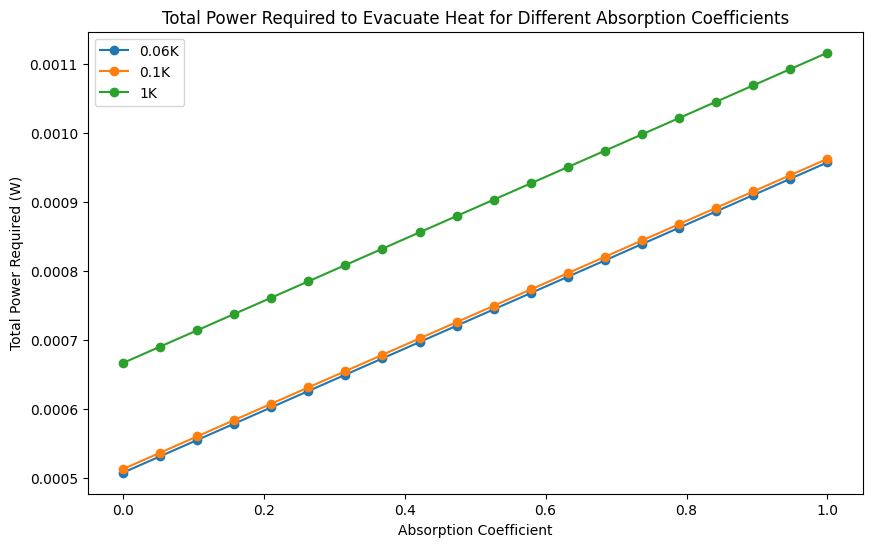

In [18]:
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

def model_cryostat_heat(
    temp_attenuation: Dict[float, float], 
    input_power: float, 
    absorption_coeff: float
) -> float:
    lowest_temp = min(temp_attenuation.keys())
    sorted_temps = sorted(temp_attenuation.keys(), reverse=True)
    
    total_power_required = 0
    
    remaining_power = input_power
    for temp in sorted_temps:
        attenuation = temp_attenuation[temp]
        heat_dissipated = remaining_power * (1 - attenuation)
        
        if temp == lowest_temp:
            heat_dissipated = heat_dissipated * absorption_coeff
            remaining_power += heat_dissipated * (1 - absorption_coeff)
        
        carnot_efficiency = 1 - (lowest_temp / temp) if temp != lowest_temp else 0
        power_required = heat_dissipated / carnot_efficiency if carnot_efficiency != 0 else heat_dissipated
        total_power_required += power_required
        
        remaining_power *= attenuation
    
    return total_power_required

def plot_total_power_vs_absorption_coeff(
    base_temp_attenuation: Dict[float, float], 
    input_power: float, 
    min_temps: List[float],
    absorption_coeff_range: List[float]
) -> None:
    plt.figure(figsize=(10, 6))
    
    for min_temp in min_temps:
        total_powers = []
        temp_attenuation = base_temp_attenuation.copy()
        temp_attenuation[min_temp] = 0.1
        
        for absorption_coeff in absorption_coeff_range:
            total_power_required = model_cryostat_heat(temp_attenuation, input_power, absorption_coeff)
            total_powers.append(total_power_required)
        
        plt.plot(absorption_coeff_range, total_powers, marker='o', label=f"{min_temp}K")
    
    plt.xlabel('Absorption Coefficient')
    plt.ylabel('Total Power Required (W)')
    plt.title('Total Power Required to Evacuate Heat for Different Absorption Coefficients')
    plt.legend()
    plt.show()

# Define temperature and attenuation dictionary
base_temp_attenuation = {
    300: 1,  # 300K with no attenuation
    4: 0.5  # 4K with 0.5 attenuation
}

# Define input power in watts
input_power = 1e-3  # 1mW

# Define range of minimum temperatures
min_temps = [0.06, 0.1, 1]

# Define range of absorption coefficients
absorption_coeff_range = np.linspace(0, 1, 20)

# Generate the plot
plot_total_power_vs_absorption_coeff(base_temp_attenuation, input_power, min_temps, absorption_coeff_range.tolist())


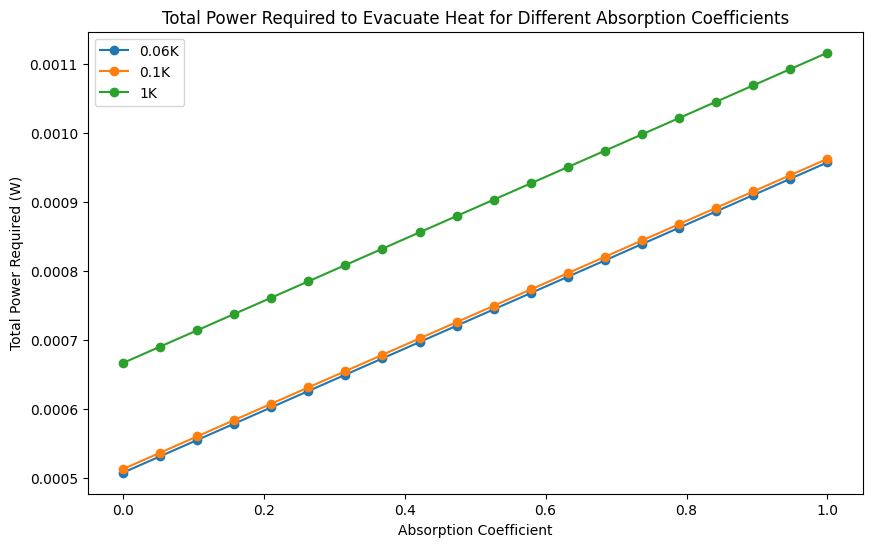

In [19]:
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

def model_cryostat_heat(
    temp_attenuation: Dict[float, float], 
    input_power: float, 
    absorption_coeff: float
) -> float:
    lowest_temp = min(temp_attenuation.keys())
    sorted_temps = sorted(temp_attenuation.keys(), reverse=True)
    
    total_power_required = 0
    
    remaining_power = input_power
    for temp in sorted_temps:
        attenuation = temp_attenuation[temp]
        heat_dissipated = remaining_power * (1 - attenuation)
        
        if temp == lowest_temp:
            heat_dissipated = heat_dissipated * absorption_coeff
            remaining_power += heat_dissipated * (1 - absorption_coeff)
        
        carnot_efficiency = 1 - (lowest_temp / temp) if temp != lowest_temp else 0
        power_required = heat_dissipated / carnot_efficiency if carnot_efficiency != 0 else heat_dissipated
        total_power_required += power_required
        
        remaining_power *= attenuation
    
    return total_power_required

def plot_total_power_vs_absorption_coeff(
    base_temp_attenuation: Dict[float, float], 
    input_power: float, 
    min_temps: List[float],
    absorption_coeff_range: List[float]
) -> None:
    plt.figure(figsize=(10, 6))
    
    for min_temp in min_temps:
        total_powers = []
        temp_attenuation = base_temp_attenuation.copy()
        temp_attenuation[min_temp] = 0.1
        
        for absorption_coeff in absorption_coeff_range:
            total_power_required = model_cryostat_heat(temp_attenuation, input_power, absorption_coeff)
            total_powers.append(total_power_required)
        
        plt.plot(absorption_coeff_range, total_powers, marker='o', label=f"{min_temp}K")
    
    plt.xlabel('Absorption Coefficient')
    plt.ylabel('Total Power Required (W)')
    plt.title('Total Power Required to Evacuate Heat for Different Absorption Coefficients')
    plt.legend()
    plt.show()

# Define temperature and attenuation dictionary
base_temp_attenuation = {
    300: 1,  # 300K with no attenuation
    4: 0.5  # 4K with 0.5 attenuation
}

# Define input power in watts
input_power = 1e-3  # 1mW

# Define range of minimum temperatures
min_temps = [0.06, 0.1, 1]

# Define range of absorption coefficients
absorption_coeff_range = np.linspace(0, 1, 20)

# Generate the plot
plot_total_power_vs_absorption_coeff(base_temp_attenuation, input_power, min_temps, absorption_coeff_range.tolist())
